# Task 1. Discrete Fourier Transform

## Discrete Fourier Transform implemenatation
First of all, let us implement the algorithm of computation of Fourier Transform:

In [2]:
import numpy as np

def fourier(signal):
    dim = signal.shape[0]
    w = np.e**(-2j * np.pi/dim)
    # We are using the fact, that (w)^(i*j), where i and j are the indeces of the element of the matrix 
    return np.array([np.array([w**i for i in range(dim)])**j for j in range(dim)]) @ signal[:, None]

## DFT Frequencies Indexing
The next part of the problem is to generate indeces:

In [3]:
def frequencies(dim, fs):
    return [(i*fs)/dim for i in range(dim)]

Finally, let us unite the function because Python allows us to do so:

In [4]:
def DFT(signal, fs):
    return fourier(signal), frequencies(signal.size, fs)

## DFT verification

### Signal 1. Period=4

In [5]:
# Base signal
period=4
T=3
fssin = 10000
sinus = np.array([np.sin(period*2*np.pi*n/fssin) for n in range(fssin*T)])
# DFT signal
fs = 20
signal = np.array([np.sin(period*2*np.pi*n/fs) for n in range(fs*T)])

Plotting sinus:

Text(0, 0.5, 'Amplitude')

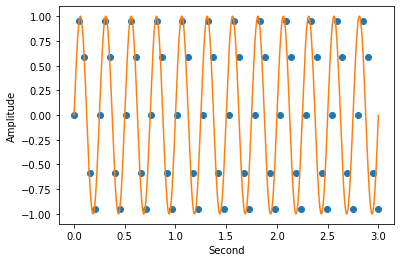

In [6]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(0, 3, fs*T), signal, 'o')
plt.plot(np.linspace(0, 3, fssin*T), sinus)
plt.xlabel('Second')
plt.ylabel('Amplitude')

Plotting DFT:

In [7]:
transf_sig, freq = DFT(signal, fs)

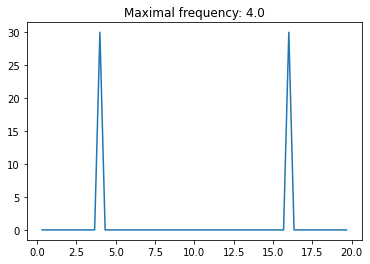

In [8]:
plt.plot(freq[1:], np.abs(transf_sig[1:]))
plt.title(f'Maximal frequency: {freq[np.abs(transf_sig).argmax()]}')
plt.show()

### Signal 2. Period=25

In [9]:
# Base signal
period=25
T=1
fssin = 10000
sinus = np.array([np.sin(period*2*np.pi*n/fssin) for n in range(fssin*T)])
# DFT signal
fs = 100
signal = np.array([np.sin(period*2*np.pi*n/fs) for n in range(fs*T)])

Plotting sinus:

Text(0, 0.5, 'Amplitude')

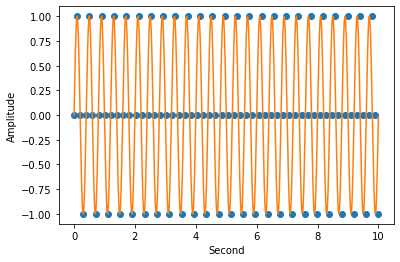

In [10]:
from matplotlib import pyplot as plt
plt.plot(np.linspace(0, 10, fs*T), signal, 'o')
plt.plot(np.linspace(0, 10, fssin*T), sinus)
plt.xlabel('Second')
plt.ylabel('Amplitude')

In [11]:
transf_sig, freq = DFT(signal, fs)

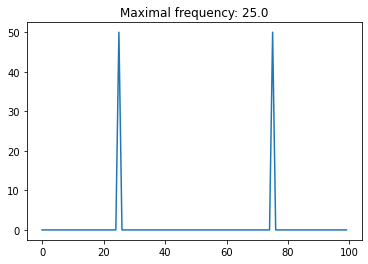

In [12]:
plt.plot(freq, np.abs(transf_sig))
plt.title(f'Maximal frequency: {freq[np.abs(transf_sig).argmax()]}')
plt.show()

# Task 2. Spectral Leakage

We will take 3 signals with frequencies 10, 19, 7

In [35]:
# Base signal
T=2.5
# DFT signal
fs = 50
samples = fs*T
signal = np.array([np.sin(19*2*np.pi*n/fs) for n in range(int(fs*T))])
signal2 = np.array([np.sin(10*2*np.pi*n/fs) for n in range(int(fs*T))])
signal3 = np.array([np.sin(5*2*np.pi*n/fs) for n in range(int(fs*T))])
print(f'Condition for signal 1 - {samples/(fs/19)}')
print(f'Condition for signal 2 - {samples/(fs/10)}')
print(f'Condition for signal 3 - {samples/(fs/5)}')

Condition for signal 1 - 47.5
Condition for signal 2 - 25.0
Condition for signal 3 - 12.5


In [36]:
transf_sig, freq = DFT(signal + signal2 + signal3 , fs)

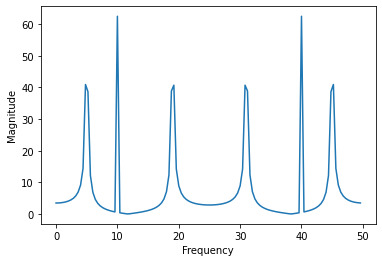

In [37]:
plt.plot(freq, np.abs(transf_sig))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

The first spike corresponds to the first frequency 5, it has leakage around that place. The second spike corresponds to the frequency 10 and it has no leakage. The third spike corresponds to frequency 20 and has leakage

# Task 3. Plotting cosine signal

In [46]:
# First signal
T=0.5
freq = 190
A1=0.5
fs = 200
cos1 = np.array([A1*np.cos(freq*2*np.pi*n/(fs*1000)) for n in range(int(fs*T*1000))])
signal1 = np.array([A1*np.cos(freq*2*np.pi*n/fs) for n in range(int(fs*T))])
# Second signal
freq2 = 10
A2=2
cos2 = np.array([A2*np.cos(freq2*2*np.pi*n/(fs*1000)) for n in range(int(fs*T*1000))])
signal2 = np.array([A2*np.cos(freq2*2*np.pi*n/fs) for n in range(int(fs*T))])

In [40]:
# Calculating DFT
transf_sig1, freq1 = DFT(signal1 , fs)
transf_sig2, freq2 = DFT(signal2 , fs)

First signal (freq=190)

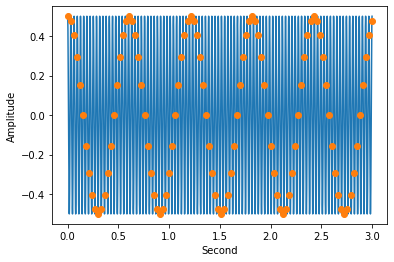

In [41]:
plt.plot(np.linspace(0, 3, int(fs*T*1000)), cos1)
plt.plot(np.linspace(0, 3, int(fs*T)), signal1, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

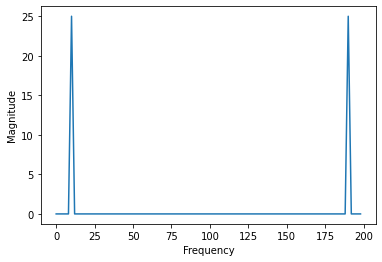

In [42]:
# DFT
plt.plot(freq1, np.abs(transf_sig1))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Second Signal (freq=10)

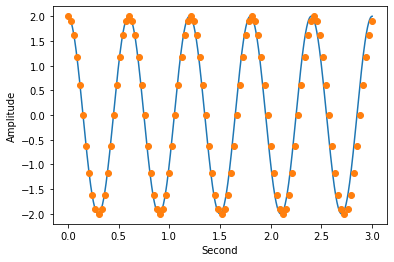

In [43]:
plt.plot(np.linspace(0, 3, int(fs*T*1000)), cos2)
plt.plot(np.linspace(0, 3, int(fs*T)), signal2, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

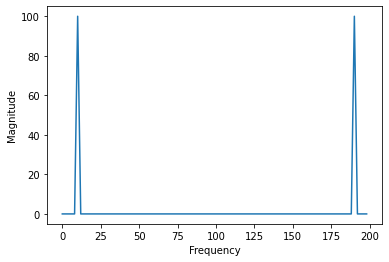

In [45]:
# DFT
plt.plot(freq2, np.abs(transf_sig2))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

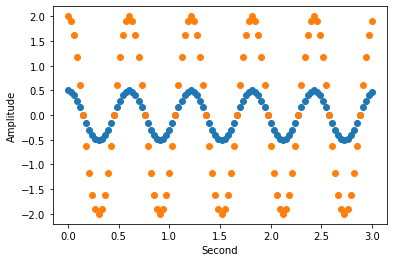

In [44]:
plt.plot(np.linspace(0, 3, int(fs*T)), signal1, 'o')
plt.plot(np.linspace(0, 3, int(fs*T)), signal2, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

As we can see, we got the aliasing problem. Let us firstly say that $sin(x+\frac{\pi}{2}) = cos(x)$, so the theory for aliasing holds for cosine. $f1 = 190, f2 = 10, fs=200$. If we take $N=-1$: 
$$cos(2\pi 10t) = cos (2\pi (190 + (-1)200)t)=cos(2\pi(-10)t)=cos(2\pi 10t)$$
, we get that f2 is alias of the f1 and vice versa. It looks as though we got the same frequencies, but in fact we did not. To avoid it, we need to take the sampling rate at least twice as high as the highest harmonic (380):

In [47]:
T=0.5
freq = 190
A1=0.5
fs = 380
cos1 = np.array([A1*np.cos(freq*2*np.pi*n/(fs*1000)) for n in range(int(fs*T*1000))])
signal1 = np.array([A1*np.cos(freq*2*np.pi*n/fs) for n in range(int(fs*T))])
freq2 = 10
A2=2
cos2 = np.array([A2*np.cos(freq2*2*np.pi*n/(fs*1000)) for n in range(int(fs*T*1000))])
signal2 = np.array([A2*np.cos(freq2*2*np.pi*n/fs) for n in range(int(fs*T))])

In [48]:
transf_sig1, freq1 = DFT(signal1 , fs)
transf_sig2, freq2 = DFT(signal2 , fs)

First signal (freq = 190)

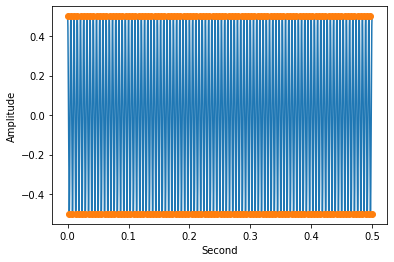

In [52]:
plt.plot(np.linspace(0, 0.5, int(fs*T*1000)), cos1)
plt.plot(np.linspace(0, 0.5, int(fs*T)), signal1, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

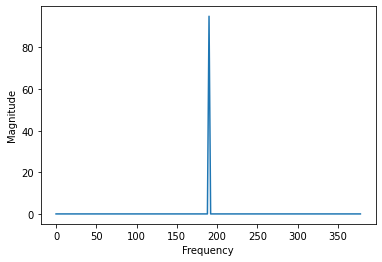

In [57]:
# DFT
plt.plot(freq1, np.abs(transf_sig1))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Second Signal (freq=10)

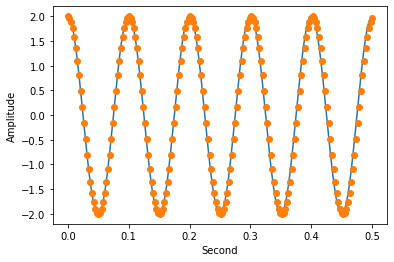

In [54]:
plt.plot(np.linspace(0, 0.5, int(fs*T*1000)), cos2)
plt.plot(np.linspace(0, 0.5, int(fs*T)), signal2, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

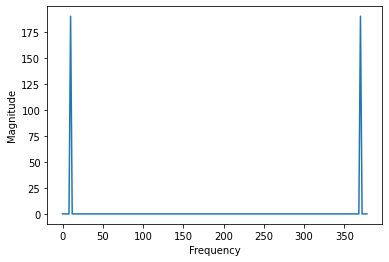

In [56]:
# DFT
plt.plot(freq2, np.abs(transf_sig2))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Both Signals

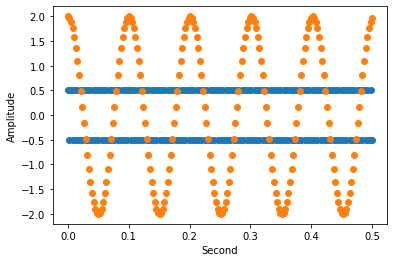

In [55]:
plt.plot(np.linspace(0, 0.5, int(fs*T)), signal1, 'o')
plt.plot(np.linspace(0, 0.5, int(fs*T)), signal2, 'o')
plt.xlabel('Second')
plt.ylabel('Amplitude')
plt.show()

# Task 4. Show that basis vectors for DFT are orthogonal, i.e
$\frac{1}{N} \sum^{N-1}_{n=0} (e^{-j2 \pi k \frac{n}{N}})^* \cdot e^{-j2\pi \hat k \frac{n}{N}} \ne 0 \iff k = \hat k$

First of all, let us open the conjugate and multiply the e:
$$\frac{1}{N} \sum^{N-1}_{n=0} (e^{-j2 \pi k \frac{n}{N}})^* \cdot e^{-j2\pi \hat k \frac{n}{N}} = \frac{1}{N} \sum^{N-1}_{n=0} e^{j2 \pi k \frac{n}{N}} \cdot e^{-j2\pi \hat k \frac{n}{N}} = \frac{1}{N} \sum^{N-1}_{n=0} e^{-j2 \pi k \frac{n}{N} -j2\pi \hat k \frac{n}{N}} = \frac{1}{N} \sum^{N-1}_{n=0} e^{-j2 \pi \frac{n}{N}(k - \hat k)}$$
1\) $k = \hat k$:
$$ \frac{1}{N} \sum^{N-1}_{n=0} e^{-j2 \pi \frac{n}{N} \cdot 0} = \frac{1}{N} \sum^{N-1}_{n=0} 1 = \frac{N}{N} = 1$$
2\) $k \ne \hat k$:
In this case, we get the sum of geometric progression, where its first element $b_1 = 1$, $q = e^{-j2 \pi \frac{(k - \hat k)}{N}}$:
$$\frac{1}{N} \sum^{N-1}_{n=0} e^{-j2 \pi \frac{n}{N}(k - \hat k)} = \frac{1}{N} \cdot \frac{1 \cdot (1 - (e^{-j2 \pi \frac{(k - \hat k)}{N}})^N)}{1- e^{-j2 \pi \frac{(k - \hat k)}{N}}}$$
Let us observe the part from the numerator (We will also use: $e^-2 \pi j x = cos(2\pi x) - j sin(2\pi x)$ ):
$$ (e^{-j2 \pi \frac{(k - \hat k)}{N}})^N = e^{-j2 \pi (k - \hat k)} = cos(2\pi (k- \hat k)) - j sin(2\pi (k- \hat k)) = 1 - 0 = 1$$
Substituting the result in the fraction:
$$ \frac{1}{N} \cdot \frac{1 \cdot (1 - 1)}{1- e^{-j2 \pi \frac{(k - \hat k)}{N}}} = 0$$
Therefore, we have proven:
$$\frac{1}{N} \sum^{N-1}_{n=0} (e^{-j2 \pi k \frac{n}{N}})^* \cdot e^{-j2\pi \hat k \frac{n}{N}} \ne 0 \iff k = \hat k$$